# Gradient Descent

Gradient descent to find the minimum of the power dissipated in a resistor, given by the formula:
$P = I^2 R$
where $P$ is the power dissipated, $I$ is the current flowing through the resistor, and $R$ is the resistance.

In [163]:
import matplotlib.pyplot as plt
import numpy as np

## Defining function

In [164]:
# I define a constant resistance in ohm
R=5

def power_dissipation(I, R):
    return I**2 * R

# Define the gradient (derivative) of the power dissipation function
def gradient(I, R):
    return 2*I*R


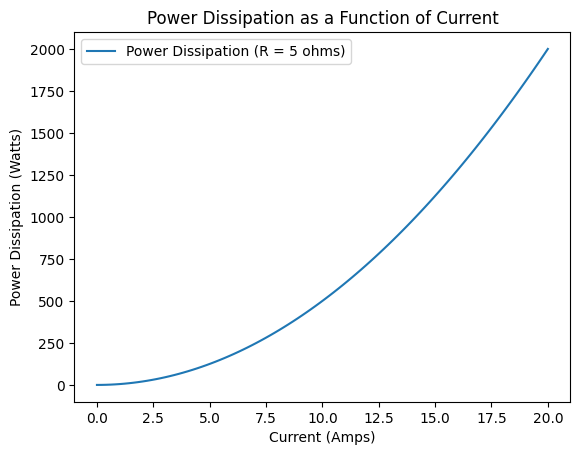

In [165]:
# Plot the power dissipation as a function of current
I_values = np.linspace(0, 20, 100)
P_values = power_dissipation(I_values, R)

plt.plot(I_values, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current")
plt.legend()
plt.show()

## Gradient descent application

In [166]:
# Gradient Descent function to find the minimum
def derivative_descent(derivative, alpha=0.8, I_0=5.0, max_iter=1000):
    """
    Gradient Descent function to find the minimum of a function using its derivative.

    Parameters:
    - derivative: A callable function representing the derivative of the target function to minimize.
    - alpha (float, optional): The learning rate, which determines the step size in each iteration. Default is 0.8.
    - I_0 (float, optional): The initial guess for the value of the variable being optimized. Default is 5.0.
    - max_iter (int, optional): The maximum number of iterations to perform. Default is 1000.

    Returns:
    - np.array: An array of values representing the progression of the variable being optimized 
                through gradient descent.
    - list: A list of Mean Squared Errors (MSE) at each iteration.
    """
    I_values = [I_0]
    mse_values = []  # Track Mean Squared Error at each step
    i = 0
    while abs(derivative(I_values[-1], R)) > 0.001 and i < max_iter:
        I_new = I_values[-1] - alpha * derivative(I_values[-1], R)
        I_values.append(I_new)
        mse = (I_new - 0) ** 2  # Compute MSE as difference between current I and minimum I=0
        mse_values.append(mse)
        i += 1

    # Convert to numpy array for consistency
    I_values = np.array(I_values)

    return I_values, mse_values


In [167]:
# Run gradient descent
I_values, mse_values =derivative_descent(gradient, alpha=0.01, I_0=5, max_iter=10)

In [169]:
print(I_values)
print(mse_values)

[5.         4.5        4.05       3.645      3.2805     2.95245
 2.657205   2.3914845  2.15233605 1.93710244 1.7433922 ]
[20.25, 16.4025, 13.286024999999997, 10.761680249999998, 8.716961002499998, 7.060738412024999, 5.719198113740249, 4.632550472129601, 3.7523658824249773, 3.0394163647642314]


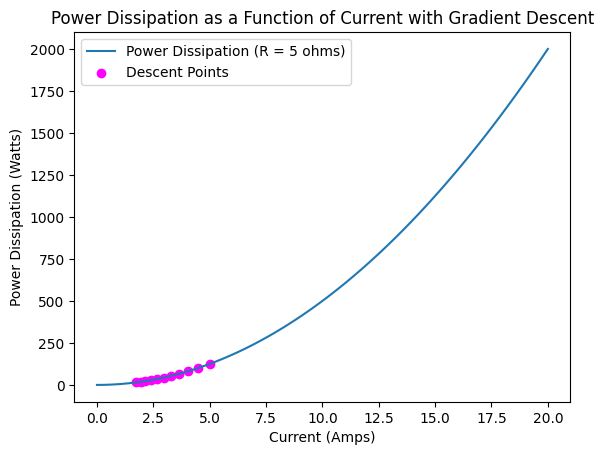

Final Current that minimizes power dissipation: I = 1.7434 A


In [170]:
# Define domain for plotting power dissipation
I_domain = np.linspace(0, 20, 100)
P_values = power_dissipation(I_domain, R)

# Plot the power dissipation as a function of current
plt.plot(I_domain, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.scatter(I_values, power_dissipation(I_values, R), color="magenta", label="Descent Points")
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current with Gradient Descent")
plt.legend()
plt.show()

# Print the final current that minimizes power dissipation
final_I = I_values[-1]
print(f"Final Current that minimizes power dissipation: I = {final_I:.4f} A")

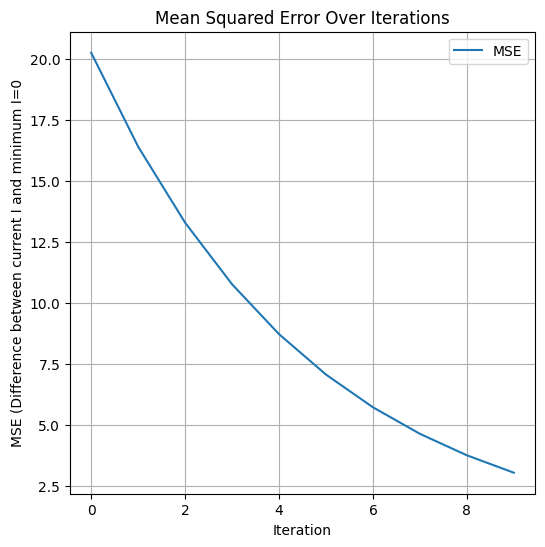

In [171]:
# Plot MSE over iterations
plt.figure(figsize=(6, 6))
plt.plot(range(len(mse_values)), mse_values, label="MSE")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE (Difference between current I and minimum I=0")
plt.grid(True)
plt.legend()
plt.show()

If we try with more iterations, we should get to zero. We can see in the MSE plot how it is reduced in each iteration.

In [172]:
# Run gradient descent
I_values, mse_values = derivative_descent(gradient, alpha=0.01, I_0=5, max_iter=100)

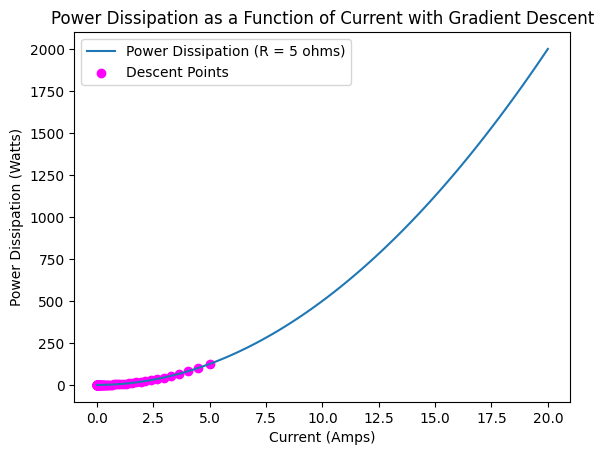

Final Current that minimizes power dissipation: I = 0.0001 A


In [173]:
# Define domain for plotting power dissipation
I_domain = np.linspace(0, 20, 100)
P_values = power_dissipation(I_domain, R)

# Plot the power dissipation as a function of current
plt.plot(I_domain, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.scatter(I_values, power_dissipation(I_values, R), color="magenta", label="Descent Points")
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current with Gradient Descent")
plt.legend()
plt.show()

# Print the final current that minimizes power dissipation
final_I = I_values[-1]
print(f"Final Current that minimizes power dissipation: I = {final_I:.4f} A")

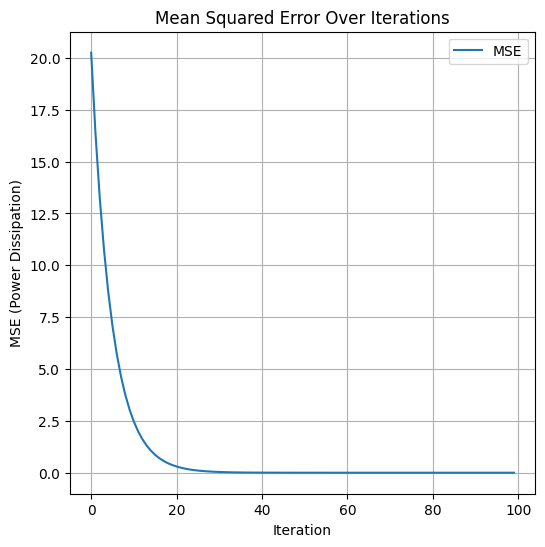

In [175]:
# Plot MSE over iterations
plt.figure(figsize=(6, 6))
plt.plot(range(len(mse_values)), mse_values, label="MSE")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE (Power Dissipation)")
plt.grid(True)
plt.legend()
plt.show()

This time, we reached 0 errors around the iteration 30. I'll see what happens when increasing alpha.

In [176]:
# Run gradient descent
I_values, mse_values = derivative_descent(gradient, alpha=0.075, I_0=5, max_iter=10)

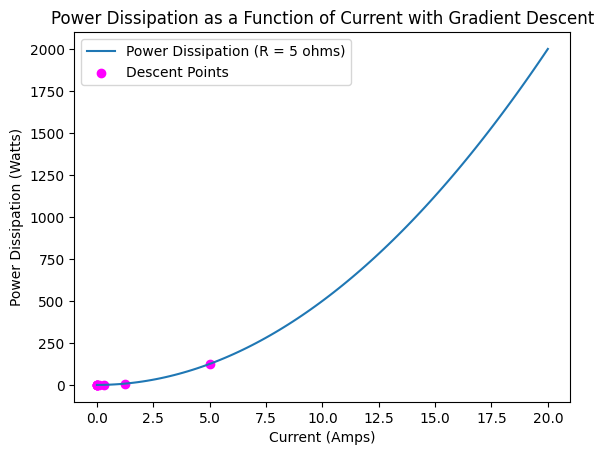

Final Current that minimizes power dissipation: I = 0.0001 A


In [177]:
# Define domain for plotting power dissipation
I_domain = np.linspace(0, 20, 100)
P_values = power_dissipation(I_domain, R)

# Plot the power dissipation as a function of current
plt.plot(I_domain, P_values, label=f'Power Dissipation (R = {R} ohms)')
plt.scatter(I_values, power_dissipation(I_values, R), color="magenta", label="Descent Points")
plt.xlabel("Current (Amps)")
plt.ylabel("Power Dissipation (Watts)")
plt.title("Power Dissipation as a Function of Current with Gradient Descent")
plt.legend()
plt.show()

# Print the final current that minimizes power dissipation
final_I = I_values[-1]
print(f"Final Current that minimizes power dissipation: I = {final_I:.4f} A")

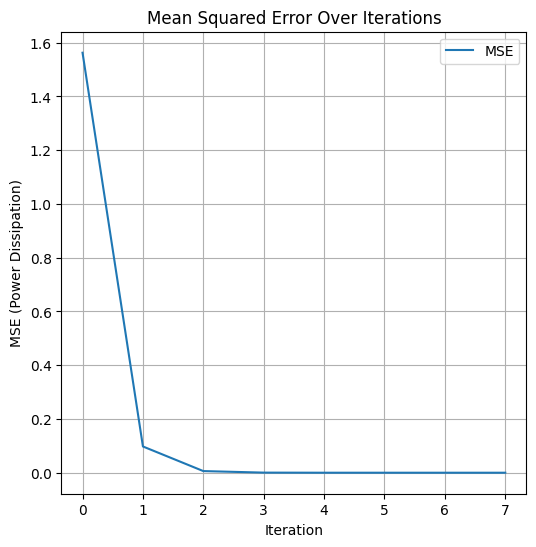

In [178]:
# Plot MSE over iterations
plt.figure(figsize=(6, 6))
plt.plot(range(len(mse_values)), mse_values, label="MSE")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE (Power Dissipation)")
plt.grid(True)
plt.legend()
plt.show()

## Conclusion
This project demonstrates how the Gradient Descent algorithm can be implemented from scratch and used to solve a linear regression problem. By adjusting hyperparameters like the learning rate and initial parameters, we can influence the convergence behavior of the algorithm. Visualizing the MSE and the iterations in the function provides insights into the optimization process and the effectiveness of Gradient Descent. The MSE was calculated with the difference between current I and minimum I=0.

# Gradient descent with real data
In the previous part of the Jupyter notebook we applied Gradient descent to find the minimum of the power dissipated in a resistor. Now, we are going to use all S&P companies historical data from 2013 to 2018, and find the minimum. 

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## **Data pre-processing**
The data is from Kaggle, and it is uploaded in the "datasets" folder. The idea is to find the minimum value in the stock value of Apple beetween 2013 and 2018.

In [150]:
# Load the dataset
file_path = '/Users/ceciliaalberti/Documents/INDE_577/datasets/all_stocks_5yr.csv'
df = pd.read_csv(file_path)
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [151]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [152]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [153]:
# Filter the dataset for a specific stock, in this case, Apple (AAPL)
stock_name = 'AAPL'
stock_df = df[df['Name'] == stock_name]

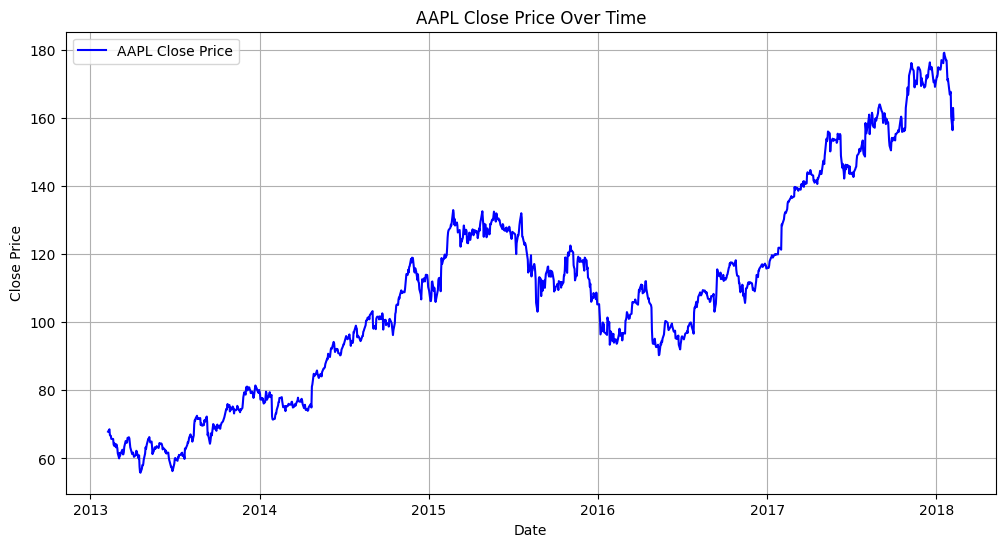

In [154]:
# Plot the 'close' prices over time for the selected stock
plt.figure(figsize=(12, 6))
plt.plot(stock_df['date'], stock_df['close'], label=f'{stock_name} Close Price', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{stock_name} Close Price Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [155]:
# Extract the relevant columns
time_steps = np.arange(len(stock_df))  # Use index as the time steps
close_prices = stock_df['close'].values

## **Gradient descent algorithm**

In [156]:
# Numerical gradient calculation
def numerical_gradient(values, index, epsilon=1):
    """
    Compute the gradient at a given index using finite differences.
    """
    if index == 0:  # Forward difference for the first point
        return (values[index + 1] - values[index]) / epsilon
    elif index == len(values) - 1:  # Backward difference for the last point
        return (values[index] - values[index - 1]) / epsilon
    else:  # Central difference for other points
        return (values[index + 1] - values[index - 1]) / (2 * epsilon)

In [157]:
# Gradient descent for stock prices
def gradient_descent_stock(values, learning_rate=5.0, initial_step=0, max_iter=100, tolerance=0.001, epsilon=1):
    """
    Gradient descent for discrete stock prices.
    """
    steps = [initial_step]
    losses = [values[initial_step]]

    for i in range(max_iter):
        current_step = steps[-1]

        # Compute the gradient at the current step
        grad = numerical_gradient(values, current_step, epsilon=epsilon)

        # Debugging: Print gradient values
        print(f"Iteration {i}: Current Step = {current_step}, Gradient = {grad}")

        # Stop if gradient magnitude is small
        if abs(grad) < tolerance:
            print("Gradient too small; stopping early.")
            break

        # Update the step
        new_step = current_step - learning_rate * grad
        new_step = round(new_step)  # Ensure the step is an integer
        new_step = max(0, min(len(values) - 1, new_step))  # Clip to valid bounds

        # Stop if no progress is made
        if new_step == current_step:
            print("No progress; stopping.")
            break

        steps.append(new_step)
        losses.append(values[new_step])

    return steps, losses


In [158]:
# Smooth the stock prices using a moving average
def smooth_prices(prices, window_size=5):
    """
    Smooth stock prices using a moving average.
    """
    return np.convolve(prices, np.ones(window_size) / window_size, mode='valid')

smoothed_prices = smooth_prices(close_prices)

Iteration 0: Current Step = 800, Gradient = -1.1039999999999992
Iteration 1: Current Step = 811, Gradient = -0.2610000000000028
Iteration 2: Current Step = 814, Gradient = -0.3440000000000083
Iteration 3: Current Step = 817, Gradient = -0.1110000000000042
Iteration 4: Current Step = 818, Gradient = 0.11599999999999255
Iteration 5: Current Step = 817, Gradient = -0.1110000000000042
Iteration 6: Current Step = 818, Gradient = 0.11599999999999255
Iteration 7: Current Step = 817, Gradient = -0.1110000000000042
Iteration 8: Current Step = 818, Gradient = 0.11599999999999255
Iteration 9: Current Step = 817, Gradient = -0.1110000000000042
Iteration 10: Current Step = 818, Gradient = 0.11599999999999255
Iteration 11: Current Step = 817, Gradient = -0.1110000000000042
Iteration 12: Current Step = 818, Gradient = 0.11599999999999255
Iteration 13: Current Step = 817, Gradient = -0.1110000000000042
Iteration 14: Current Step = 818, Gradient = 0.11599999999999255
Iteration 15: Current Step = 817, G

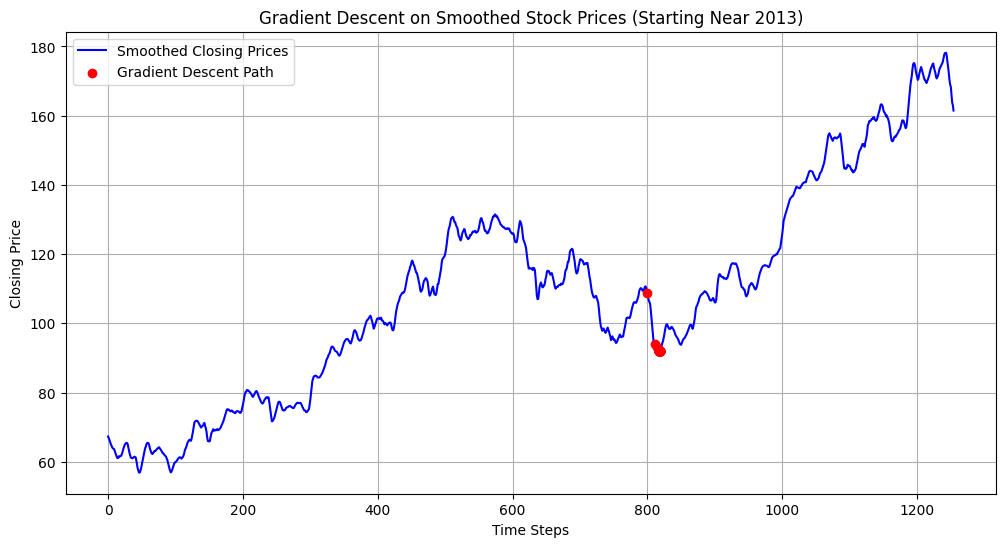

Steps Taken (Indices): [800, 811, 814, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818, 817, 818]
Prices at Steps: [np.float64(108.694), np.float64(93.99799999999999), np.float64(93.272), np.float64(91.91600000000001), np.float64(92.134), np.float64(91.91600000000001), np.float64(92.134), np.float64(91.91600000000001), np.float64(92.134), np.float64(91.91600000000001), np.float64(92.134), np.float64(91.91600000000001), np.float64(92.134), np.float64(91.91600000000001), np.float64(92.134), np.float64(91.91600000000001), np.float64(92.134), np.float64(91.9160000000

In [159]:
# Gradient descent implementation
initial_step = 800  # Random start
learning_rate = 10.0 

# Run gradient descent
steps, losses = gradient_descent_stock(
    smoothed_prices, learning_rate=learning_rate, initial_step=initial_step
)

# Plot the stock prices and gradient descent path
plt.figure(figsize=(12, 6))
plt.plot(range(len(smoothed_prices)), smoothed_prices, label='Smoothed Closing Prices', color='blue')
plt.scatter(steps, [smoothed_prices[s] for s in steps], color='red', label='Gradient Descent Path', zorder=5)
plt.title('Gradient Descent on Smoothed Stock Prices (Starting Near 2013)')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Steps Taken (Indices):", steps)
print("Prices at Steps:", [smoothed_prices[s] for s in steps])

Here we can see that the gradient descent didn't reach the Global Minimum, but why?

- The gradient descent is a **local optimization algorithm**, which means that it only "sees" the gradient (slope) of the function at the current point. If the algorithm starts far away from the global minimum, it will descend to the nearest **local minimum** rather than the global one. 
- The stock price function is not a smooth, convex function. Instead, it has many peaks and valleys (local minimums) caused by the variability of the stock prices. The Gradient Descent can get "stuck" in one of the local minumums, unable to explore other parts of the function.

We'll start close to the minimum, and see what happens.

Iteration 0: Current Step = 100, Gradient = 0.12468999999999753
Iteration 1: Current Step = 99, Gradient = 0.21958000000000055
Iteration 2: Current Step = 98, Gradient = 0.4521499999999996
Iteration 3: Current Step = 96, Gradient = 0.6624300000000005
Iteration 4: Current Step = 93, Gradient = -0.1470099999999981
Iteration 5: Current Step = 94, Gradient = 0.32198999999999955
Iteration 6: Current Step = 92, Gradient = -0.5718300000000021
Iteration 7: Current Step = 95, Gradient = 0.551280000000002
Iteration 8: Current Step = 92, Gradient = -0.5718300000000021
Iteration 9: Current Step = 95, Gradient = 0.551280000000002
Iteration 10: Current Step = 92, Gradient = -0.5718300000000021
Iteration 11: Current Step = 95, Gradient = 0.551280000000002
Iteration 12: Current Step = 92, Gradient = -0.5718300000000021
Iteration 13: Current Step = 95, Gradient = 0.551280000000002
Iteration 14: Current Step = 92, Gradient = -0.5718300000000021
Iteration 15: Current Step = 95, Gradient = 0.5512800000000

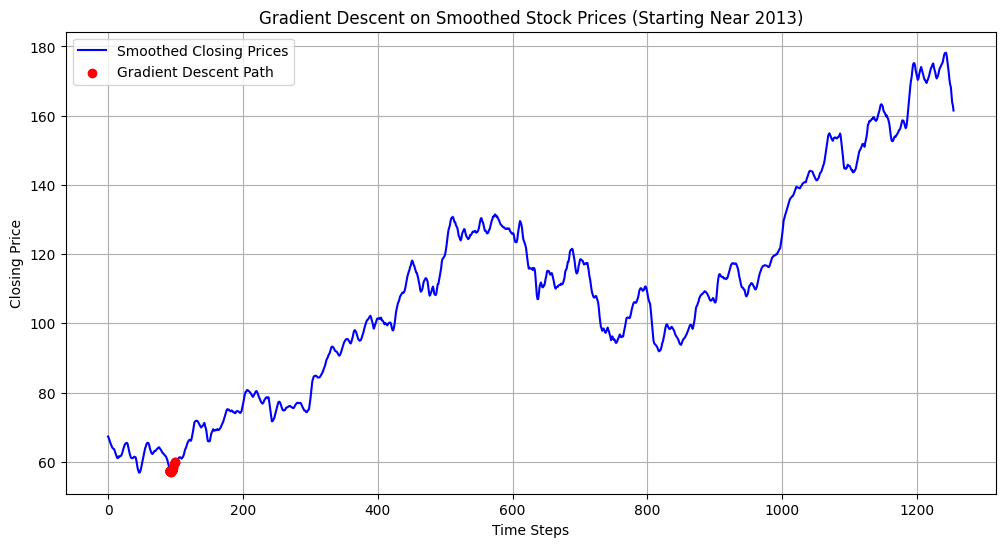

Steps Taken (Indices): [100, 99, 98, 96, 93, 94, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92, 95, 92]
Prices at Steps: [np.float64(59.89566), np.float64(59.83166), np.float64(59.4565), np.float64(58.251920000000005), np.float64(56.95852), np.float64(57.14936), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.float64(57.6025), np.float64(57.44338), np.

In [160]:
# Start close to the beginning of the dataset
initial_step = 100  # Start at a small index near the beginning
learning_rate = 5.0  # Keep the learning rate as before

# Run gradient descent
steps, losses = gradient_descent_stock(
    smoothed_prices, learning_rate=learning_rate, initial_step=initial_step
)

# Plot the stock prices and gradient descent path
plt.figure(figsize=(12, 6))
plt.plot(range(len(smoothed_prices)), smoothed_prices, label='Smoothed Closing Prices', color='blue')
plt.scatter(steps, [smoothed_prices[s] for s in steps], color='red', label='Gradient Descent Path', zorder=5)
plt.title('Gradient Descent on Smoothed Stock Prices (Starting Near 2013)')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Steps Taken (Indices):", steps)
print("Prices at Steps:", [smoothed_prices[s] for s in steps])


When starting close to the minimum, the gradient descent found it. 


## **Conclusion**
Gradient descent is a **local optimization** algorithm, meaning it uses the slope (gradient) of the function at the current point to decide the direction and size of the next step. This behavior has important implications:

- Sensitivity to starting point: Gradient descent begins its search for a minimum from the starting point. If the function has multiple valleys (local minima), the algorithm typically converges to the nearest valley, not necessarily the lowest one (global minimum).
- Local vs. Global Minimum: In functions with many peaks and valleys (non-convex functions), gradient descent can only "see" the local landscape around its current position. Without additional techniques, it cannot escape a local minimum to explore the entire function for a potentially better global minimum.

By starting closer to the global minimum (e.g., earlier in the data), you give the algorithm a better chance of finding it, avoiding the problem of getting stuck in a distant local minimum. This illustrates the importance of choosing a good starting point or combining gradient descent with other techniques for global optimization.
